FamilyCategory
Single    0.303538
Small     0.578767
Large     0.161290
Name: Survived, dtype: float64


/var/folders/kd/cm0jl91533x2s74q9f1d2fz00000gp/T/ipykernel_81723/1570091090.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("FamilyCategory")["Survived"].mean())


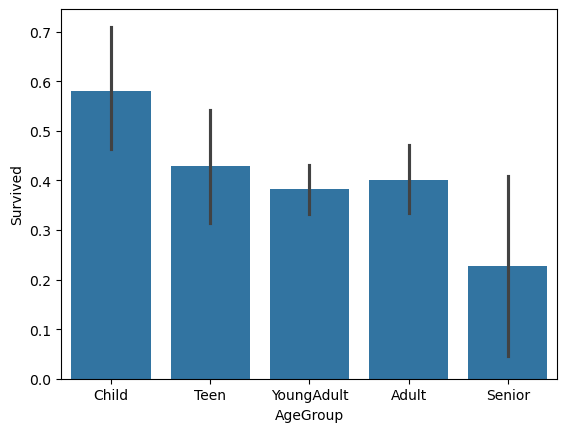

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447
Pclass   1   2   3
Sex               
female  91  70  72
male    45  17  47
Survived          1.000000
Alive             1.000000
Who               0.325753
Deck              0.295812
Fare              0.257307
FamilyCategory    0.108631
Parch             0.081629
AgeGroup          0.021762
FamilySize        0.016639
Sibsp            -0.035322
Age              -0.077221
Embarked         -0.176509
Embark_town      -0.176509
Alone            -0.203367
Pclass           -0.338481
Class            -0.338481
Sex              -0.543351
Adult_male       -0.557080
Name: Survived, dtype: float64


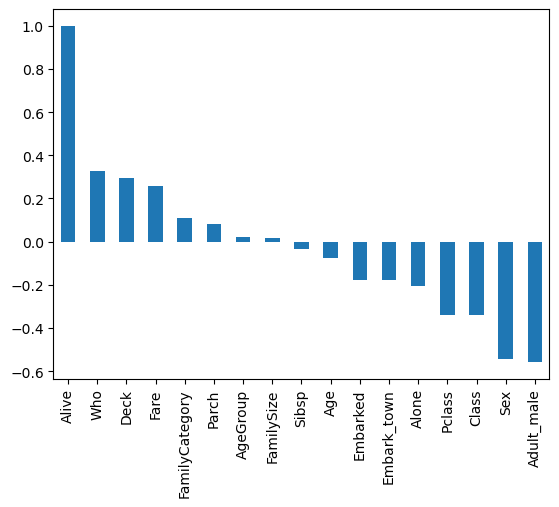

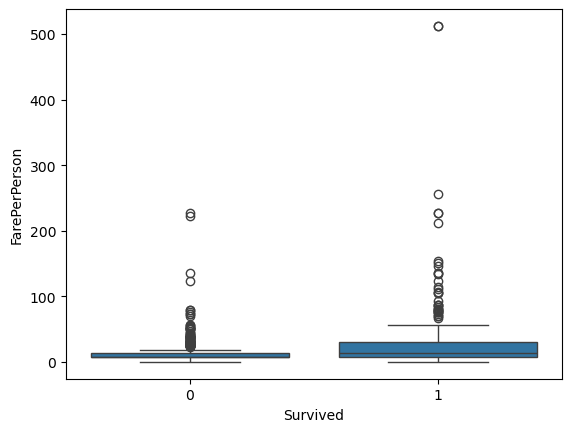

/var/folders/kd/cm0jl91533x2s74q9f1d2fz00000gp/T/ipykernel_81723/1570091090.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(["Pclass","FareGroup"])["Survived"].mean())
/var/folders/kd/cm0jl91533x2s74q9f1d2fz00000gp/T/ipykernel_81723/1570091090.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Pclass","FareGroup"])["Survived"].mean().unstack().plot(kind="line")


Pclass  FareGroup
1       Low          0.000000
        Medium       0.333333
        High         0.656863
2       Low          0.000000
        Medium       0.460432
        High         0.589744
3       Low          0.206081
        Medium       0.349650
        High         0.153846
Name: Survived, dtype: float64


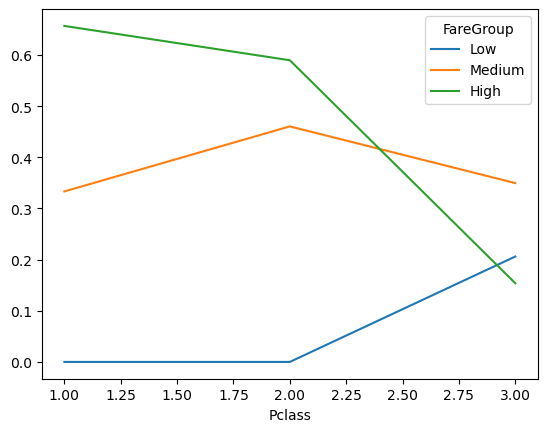

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

try:
    df = pd.read_csv("train.csv")
except FileNotFoundError:
    df = sns.load_dataset("titanic")

df.columns = [c.capitalize() for c in df.columns]
if "Survived" not in df.columns and "Alive" in df.columns:
    df["Survived"] = (df["Alive"] == "yes").astype(int)

if "Name" in df.columns:
    df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)
    print(df.groupby("Title")["Survived"].mean())

if "Cabin" in df.columns:
    df["CabinGroup"] = df["Cabin"].astype(str).str[0]
    print(df.groupby(["Pclass","CabinGroup"])["Survived"].mean())

if "Sibsp" in df.columns and "Parch" in df.columns:
    df["FamilySize"] = df["Sibsp"] + df["Parch"] + 1
    df["FamilyCategory"] = pd.cut(df["FamilySize"], bins=[0,1,4,20], labels=["Single","Small","Large"])
    print(df.groupby("FamilyCategory")["Survived"].mean())

if "Age" in df.columns:
    df["AgeGroup"] = pd.cut(df["Age"], bins=[0,12,18,35,60,100], labels=["Child","Teen","YoungAdult","Adult","Senior"])
    sns.barplot(x="AgeGroup", y="Survived", data=df)
    plt.show()

if "Sex" in df.columns and "Pclass" in df.columns:
    print(pd.pivot_table(df, values="Survived", index="Sex", columns="Pclass"))
    print(pd.pivot_table(df, values="Survived", index="Sex", columns="Pclass", aggfunc="sum"))

if "Age" in df.columns and "Title" in df.columns:
    df["Age"] = df.groupby("Title")["Age"].apply(lambda x: x.fillna(x.median()))

df_enc = df.copy()
for col in df_enc.select_dtypes(include=["object","category"]).columns:
    df_enc[col] = df_enc[col].astype("category").cat.codes

corr = df_enc.corr(numeric_only=True)["Survived"].sort_values(ascending=False)
print(corr)
corr.drop("Survived").plot(kind="bar")
plt.show()

if "Ticket" in df.columns:
    ticket_groups = df.groupby("Ticket").size().sort_values(ascending=False)
    print(ticket_groups.head(10))

if "Fare" in df.columns and "Pclass" in df.columns:
    df["FarePerPerson"] = df["Fare"] / df["FamilySize"].clip(lower=1)
    sns.boxplot(x="Survived", y="FarePerPerson", data=df)
    plt.show()
    df["FareGroup"] = pd.qcut(df["Fare"], q=3, labels=["Low","Medium","High"])
    print(df.groupby(["Pclass","FareGroup"])["Survived"].mean())
    df.groupby(["Pclass","FareGroup"])["Survived"].mean().unstack().plot(kind="line")
    plt.show()